# Price prediction of ridesharing service in Boston

Source of dataset: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?resource=download

The rideshare dataset is a collection of Uber and Lyft service data in Boston, which is a city in Massachusetts state in the US. According to the data source, the data is collected from 11-26-2018 to 12-18-2018. The purpose of this analysis is to predict the price of rideshare service based on the features given. In this analysis, it follows the standard procedure of data processing. Then apply different models and compare the results of them.

The dataset contains 693,071 records in total. Every record originally has 57 features. For the purpose of this analysis, irrelevant features are removed intuitively at the beginning. After removal, there are 21 features remained. Further removal may be carried out in the later stage. At this point, the remaining features are described as below.
- hour: The hour of the time where the ridesharing service is having
- day: The day of the date
- month: The month of the date
- source: Starting point of ridesharing service (take values "'Haymarket Square', 'Back Bay', 'North End', 'North Station', 'Beacon Hill', 'Boston University', 'Fenway', 'South Station', 'Theatre District', 'West End', 'Financial District', 'Northeastern University')
- destination: Ending point of ridesharing service (take values 'North Station', 'Northeastern University', 'West End', 'Haymarket Square', 'South Station', 'Fenway', 'Theatre District', 'Beacon Hill', 'Back Bay', 'North End', 'Financial District', 'Boston University')
- cab_type: The company that the ride belongs to (take values "Lyft", "Uber")
- name: The type of the ride (take values 'Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black', 'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi')
- price: The price of the ride
- distance: The distance of the ride
- temperature: The temperature of the ride
- short_summary: Short summary of the weather (take values 'Mostly Cloudy', 'Rain', 'Clear', 'Partly Cloudy', 'Overcast', 'Light Rain', 'Foggy', 'Possible Drizzle', 'Drizzle')
- precipIntensity: The rainfall intensity
- precipProbability: The probability of rainfall
- humidity: The amount of water vapor in the air
- windSpeed: The speed of the wind
- windGust: A sudden, brief increase in speed of the wind
- windBearing: The direction from which the wind is blowing at Boston
- visibility: The degree of clearness or the quality of being visible
- cloudCover: The cloud cover percentage
- uvIndex: Ultraviolet radiation index
- pressure: The weight of the air

# Import Data, Data Cleaning

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('rideshare_kaggle.csv')

For the purpose of this analysis, there are features not related to the analysis. At this point, irrelevant features are removed intuitively. Further features removal may be carried out in the later stage.

In [3]:
# Remove irrelevant features
data = data.drop(columns=['id','timestamp', 'timezone', 'product_id', 'surge_multiplier', 'temperatureLowTime',
                          'long_summary', 'windGustTime','temperatureHigh', 'temperatureHighTime', 'temperatureLow',  
                          'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 
                          'apparentTemperatureLowTime', 'dewPoint', 'latitude', 'longitude', 'ozone', 'datetime',
                          'sunriseTime', 'sunsetTime', 'precipIntensityMax', 'uvIndexTime', 'moonPhase',
                          'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
                          'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 
                          'apparentTemperatureMaxTime', 'icon', 'apparentTemperature', 'visibility.1'
                         ])
data.describe()

,hour,day,month,price,distance,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,pressure,windBearing,cloudCover,uvIndex
count,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,11.619137,17.794365,11.586684,16.545125,2.189430,39.584388,0.008922,0.146076,0.741119,6.186253,8.469860,8.467970,1010.094766,220.055853,0.686502,0.248908
std,6.948114,9.982286,0.492429,9.324359,1.138937,6.726084,0.026901,0.328938,0.138595,3.148223,5.289179,2.602888,13.472899,99.102736,0.358534,0.474097
min,0.000000,1.000000,11.000000,2.500000,0.020000,18.910000,0.000000,0.000000,0.380000,0.450000,0.800000,0.717000,988.090000,2.000000,0.000000,0.000000
25%,6.000000,13.000000,11.000000,9.000000,1.280000,36.450000,0.000000,0.000000,0.640000,3.410000,4.060000,8.432000,999.820000,124.000000,0.370000,0.000000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,40.490000,0.000000,0.000000,0.710000,5.910000,7.550000,9.880000,1009.250000,258.000000,0.820000,0.000000
75%,18.000000,28.000000,12.000000,22.500000,2.920000,43.580000,0.000000,0.000000,0.880000,8.410000,11.740000,9.996000,1021.860000,303.000000,1.000000,0.000000
max,23.000000,30.000000,12.000000,97.500000,7.860000,57.220000,0.144700,1.000000,0.960000,15.000000,27.250000,10.000000,1035.550000,356.000000,1.000000,2.000000


The temperature unit in the dataset is in Fahrenheit. For convenience, Fahrenheit is converted to Celsius.

In [4]:
# Convert 'temperature' into a list and assign a variable to the list
temp_list = data['temperature'].tolist()

# Using for-loop to loop through each value of 'temperature'
# Using the formula to convert Fahrenheit to Celsius
index = 0
for row in temp_list:
    temp_list[index] = (temp_list[index]-32)*(5/9)
    index += 1

# Convert the list back to dataframe and update the values of'temperature'
temp_df = pd.DataFrame(temp_list, columns = ['temperature'])
data.update(temp_df)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,temperature,...,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,pressure,windBearing,cloudCover,uvIndex
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,5.744444,...,0.0000,0.0,0.68,8.66,9.17,10.000,1021.98,57,0.72,0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,6.433333,...,0.1299,1.0,0.94,11.98,11.98,4.786,1003.97,90,1.00,0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,3.516667,...,0.0000,0.0,0.75,7.33,7.33,10.000,992.28,240,0.03,0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.322222,...,0.0000,0.0,0.73,5.28,5.28,10.000,1013.73,310,0.00,0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,3.022222,...,0.0000,0.0,0.70,9.14,9.14,10.000,998.36,303,0.44,0


Since the dataset does not provide weekday information but the date. To extract weekday information, datetime library is used. After obtaining the weekday information, a new column 'weekday' is combined with the dataset.

In [5]:
from datetime import datetime

# Convert 'day' and 'month' into a list and assign a variable to the list
day_list = data['day'].tolist()
month_list = data['month'].tolist()
weekday_list = []

# Manipulate date and time through datetime module and obtain weekday
index = 0
while index < len(day_list) and index < len(month_list):
    weekday = datetime(2018, month_list[index], day_list[index]).weekday()
    # Convert number into weekday
    if weekday == 0:
        weekday = "Monday"
    elif weekday == 1:
        weekday = "Tuesday"
    elif weekday == 2:
        weekday = "Wednesday"
    elif weekday == 3:
        weekday = "Thursday"
    elif weekday == 4:
        weekday = "Friday"
    elif weekday == 5:
        weekday = "Saturday"
    elif weekday == 6:
        weekday = "Sunday"
    weekday_list.append(weekday)
    index += 1

# Add a new column 'weekday' to the current dataset
weekday_df = pd.DataFrame(weekday_list, columns = ['weekday'])
data = pd.concat([data, weekday_df], axis = 1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,temperature,...,precipProbability,humidity,windSpeed,windGust,visibility,pressure,windBearing,cloudCover,uvIndex,weekday
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,5.744444,...,0.0,0.68,8.66,9.17,10.000,1021.98,57,0.72,0,Sunday
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,6.433333,...,1.0,0.94,11.98,11.98,4.786,1003.97,90,1.00,0,Tuesday
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,3.516667,...,0.0,0.75,7.33,7.33,10.000,992.28,240,0.03,0,Wednesday
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.322222,...,0.0,0.73,5.28,5.28,10.000,1013.73,310,0.00,0,Friday
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,3.022222,...,0.0,0.70,9.14,9.14,10.000,998.36,303,0.44,0,Thursday


In [6]:
# Check which feature has null values and obtain the total of them
null_check = data.isnull().sum()
null_col_val = null_check[null_check != 0]
print(null_col_val)

# Obtain a new dataframe with null values dropped
clean_data = data.dropna()

print("The length of the data before removing missing values:", len(data))
print("The length of the data after removing missing values:", len(clean_data))

price    55095
dtype: int64
The length of the data before removing missing values: 693071
The length of the data after removing missing values: 637976


# Data Exploration

### 1. Ridesharing Service Usage on Each Day

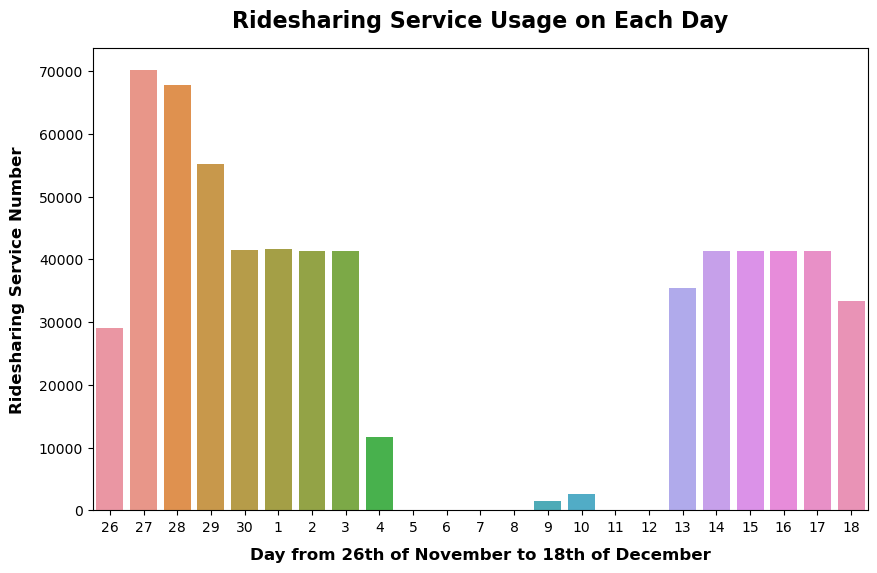

In [7]:
# Set the display order for day
day_order = [26,27,28,29,30,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

# Plot of histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = "day", data=clean_data, order = day_order)
ax.set_xlabel("Day from 26th of November to 18th of December", size = 12, labelpad = 10, fontweight = 'bold')
ax.set_ylabel("Ridesharing Service Number", size = 12, labelpad = 10, fontweight = 'bold')
ax.set_title("Ridesharing Service Usage on Each Day", size = 16, pad = 15, fontweight = 'bold')
plt.show()

From the graphs above, it can be observed that 5th to 8th, 11th and 12th are missing because there is no related data. Also, since the data is recorded from 11-26-2018 to 12-18-2018, the data from 19th to 25th is not available. 27th, 28th and, 29th of November have the highest ridesharing services usage.

### 2. Ridesharing Service Usage on Weekday

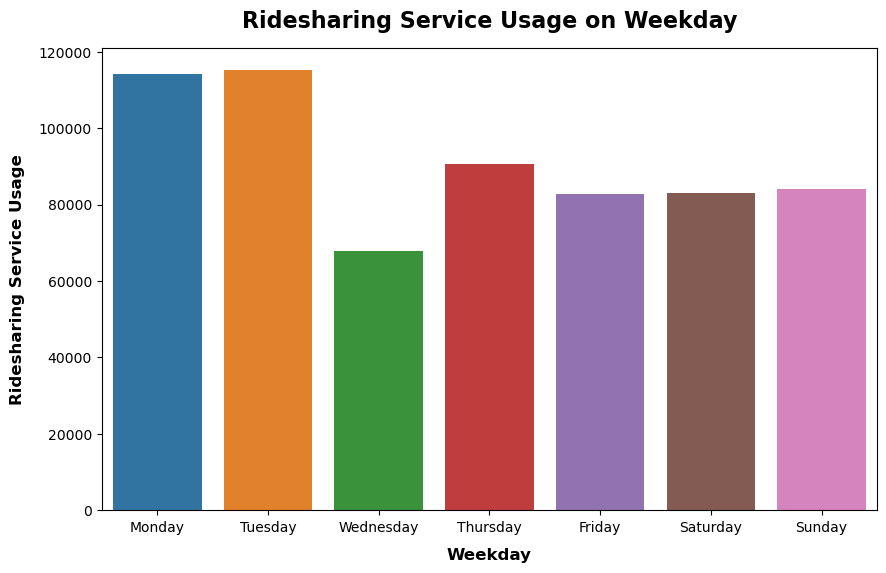

In [8]:
# Set the display order for weekday 
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot of histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = "weekday", data=clean_data, order=weekday_order)
plt.xlabel("Weekday", size = 12, labelpad = 10, fontweight = 'bold')
plt.ylabel("Ridesharing Service Usage", size = 12, labelpad = 10, fontweight = 'bold')
plt.title("Ridesharing Service Usage on Weekday", size = 16, pad = 15, fontweight = 'bold')
plt.show()

From the above graph, Monday and Tuesday show the highest ridesharing serivce usage. The other weekdays show a similar level of the usage.

### 3. Ridesharing Service Number of Source and Destination

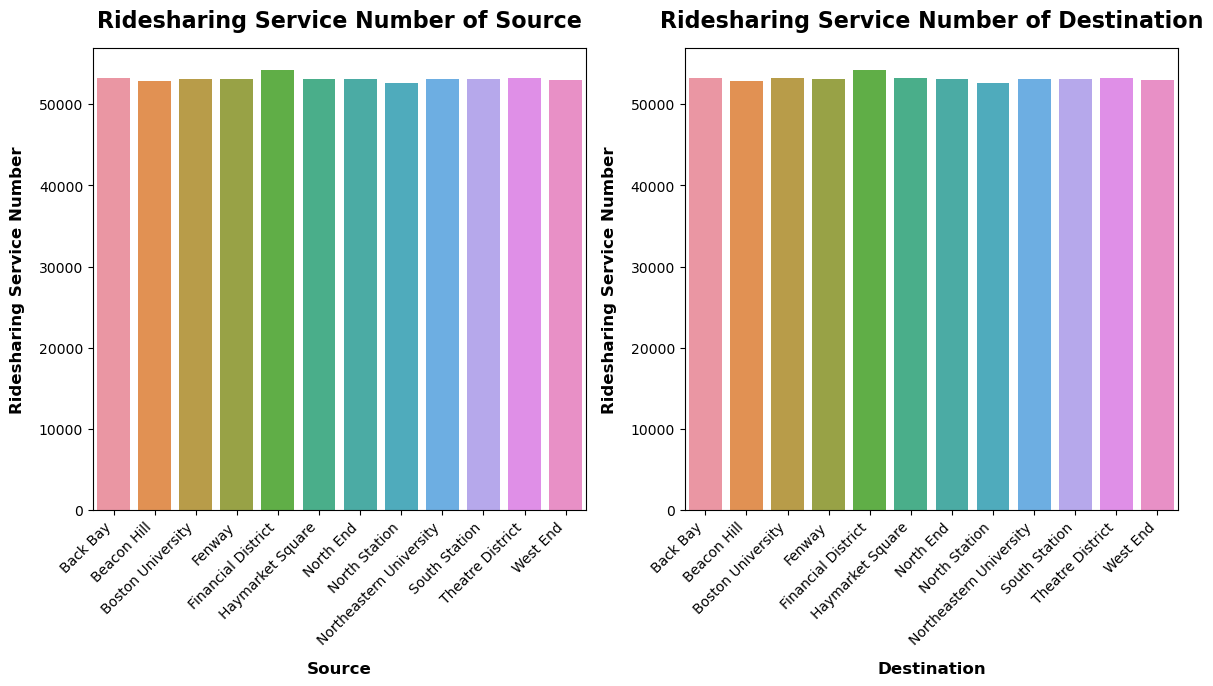

In [9]:
# Set the display order for source 
sorted_source = clean_data['source'].unique()
sorted_source.sort()
source_order = sorted_source.tolist()

# Set the display order for destination
sorted_destination = clean_data['destination'].unique()
sorted_destination.sort()
destination_order = sorted_destination.tolist()

# Countplot of source
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(x = "source", data=clean_data, ax=axes[0], order=source_order)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[0].set_xlabel("Source", size = 12, labelpad = 10, fontweight = 'bold')
axes[0].set_ylabel("Ridesharing Service Number", size = 12, labelpad = 10, fontweight = 'bold')
axes[0].set_title("Ridesharing Service Number of Source", size = 16, pad = 15, fontweight = 'bold')

# Countplot of destination
sns.countplot(x = "destination", data=clean_data, ax=axes[1], order=destination_order)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[1].set_xlabel("Destination", size = 12, labelpad = 10, fontweight = 'bold')
axes[1].set_ylabel("Ridesharing Service Number", size = 12, labelpad = 10, fontweight = 'bold')
axes[1].set_title("Ridesharing Service Number of Destination", size = 16, pad = 15, fontweight = 'bold')
plt.show()

From the above graphs, there are 12 source and 12 detinations. Both source and destinations are the same places. In other words, all the ridesharing service starts and ends in Boston. Both source and detination have a similar ridesharing service number around 50000.

### 4. Price of ridesharing service

In [10]:
# Set the display configuration to 72 to display all rows of trip_price
pd.set_option('display.max_rows', 72)

# Obtain trip_avg_price dataframe
trip_avg_price = clean_data.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
display(trip_avg_price)

,source,destination,mean
0,Back Bay,Boston University,14.039392
1,Back Bay,Fenway,13.658752
2,Back Bay,Haymarket Square,17.987384
3,Back Bay,North End,19.473019
4,Back Bay,Northeastern University,13.151040
5,Back Bay,South Station,17.700711
6,Beacon Hill,Boston University,16.376737
7,Beacon Hill,Fenway,16.158840
8,Beacon Hill,Haymarket Square,13.799137
9,Beacon Hill,North End,15.270942


In [11]:
print(clean_data['price'].describe())

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


From the statistic description above, the average price of each trip is 16.5. However, there is trip costing 97.5, which is the maximum price. It is unusual that the price would be that high if the destinations or trips are within the 12 places. Hence, it is decided to remove outliers based on boxplot.

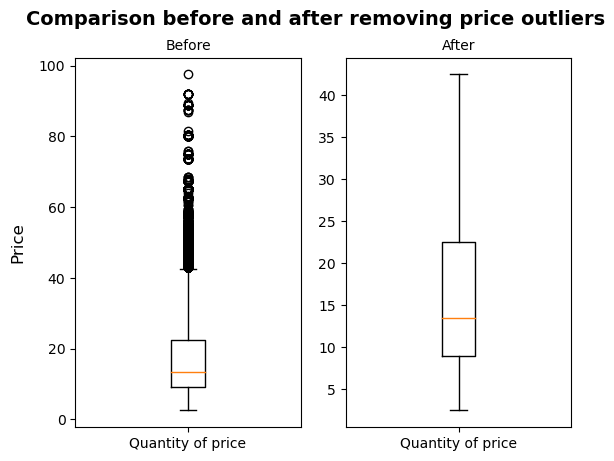

The length of the data before removing outliers: 637976
The length of the data after removing outliers: 632387


In [12]:
# Calculate Inter Quartle Range and look for upper fence
IQR = (22.5 - 9)
upper_fence = 22.5+(1.5*IQR)

# Create a new dataframe without price outliers
no_outlier_df = clean_data.drop(clean_data[clean_data['price'] > upper_fence].index)

# Create boxplot to compare result
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison before and after removing price outliers', size = 14, fontweight = 'bold')
ax1.boxplot(clean_data['price'])
ax1.set_title('Before', size = 10)
ax1.set_ylabel("Price", size = 12, labelpad = 10)
ax1.set_xticks([1], ['Quantity of price'])
ax2.boxplot(no_outlier_df['price'])
ax2.set_title('After', size = 10)
ax2.set_xticks([1], ['Quantity of price'])
plt.show()

print("The length of the data before removing outliers:", len(clean_data))
print("The length of the data after removing outliers:", len(no_outlier_df))

# Data Processing 

### Remove low correlation features

,hour,day,month,source,destination,cab_type,name,short_summary,weekday,price
0,9,16,12,5,7,0,7,4,3,5.0
1,2,27,11,5,7,0,2,8,5,11.0
2,1,28,11,5,7,0,5,0,6,7.0
3,4,30,11,5,7,0,4,0,0,26.0
4,3,29,11,5,7,0,6,6,4,9.0
...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,11,6,1,11,6,2,9.5
693066,23,1,12,11,6,1,10,6,2,13.0
693067,23,1,12,11,6,1,9,6,2,9.5
693069,23,1,12,11,6,1,1,6,2,27.0


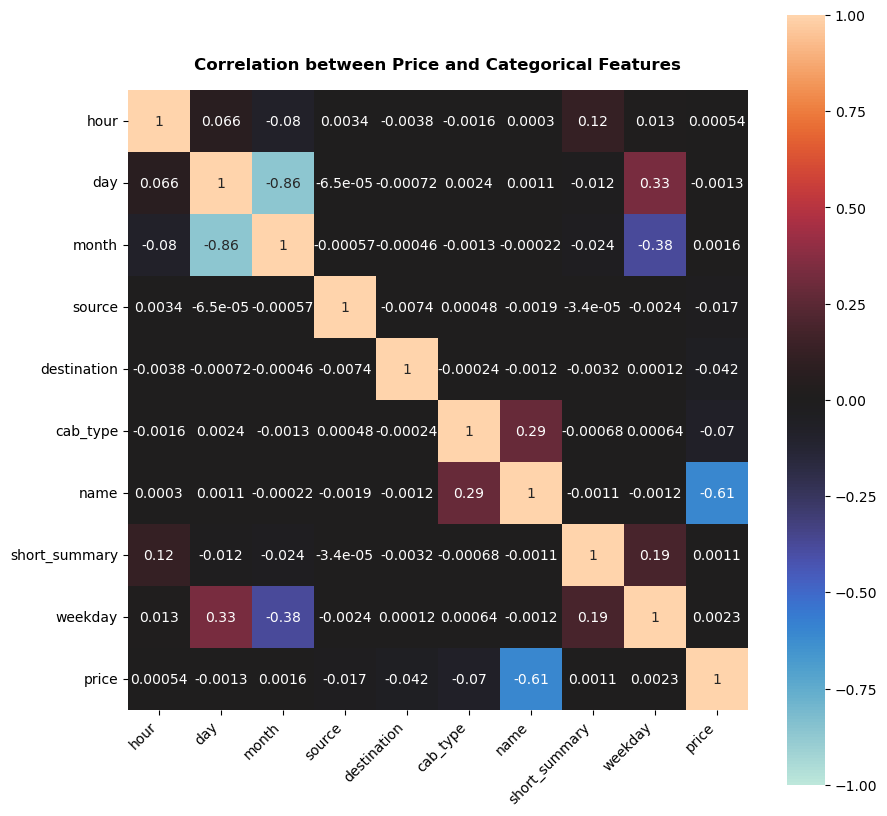

In [13]:
# Create a new dataframe to have some features and 'price'
enc_price_df = no_outlier_df[['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'short_summary', 'weekday', 'price']]

# Convert categorical variable into discrete numbers through LabelEncoder
enc = preprocessing.LabelEncoder()
for col in enc_price_df.select_dtypes(include=object).columns:
    enc_price_df[col] = enc.fit_transform(enc_price_df[col])
display(enc_price_df)

# Create heatmap
correlation = enc_price_df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation between Price and Categorical Features', size = 12, pad = 15, fontweight = "bold")
plt.show()

From the heatmap above, only 'name' has a moderate correlation with 'price'. The other features have very low correlation with 'price', thus they are removed from the dataset except 'cab_type'. Although 'cab_type' has a low correlation with 'price', it remains in the dataset because it may not be a good approach to encode 'cab_type' with LabelEncoder.

In [14]:
# Remove irrelevant features
no_outlier_df = no_outlier_df.drop(columns=['hour', 'day', 'month','source', 'destination', 'short_summary', 
                                            'weekday'], axis=1)
no_outlier_df.head()

,cab_type,name,price,distance,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,pressure,windBearing,cloudCover,uvIndex
0,Lyft,Shared,5.0,0.44,5.744444,0.0000,0.0,0.68,8.66,9.17,10.000,1021.98,57,0.72,0
1,Lyft,Lux,11.0,0.44,6.433333,0.1299,1.0,0.94,11.98,11.98,4.786,1003.97,90,1.00,0
2,Lyft,Lyft,7.0,0.44,3.516667,0.0000,0.0,0.75,7.33,7.33,10.000,992.28,240,0.03,0
3,Lyft,Lux Black XL,26.0,0.44,1.322222,0.0000,0.0,0.73,5.28,5.28,10.000,1013.73,310,0.00,0
4,Lyft,Lyft XL,9.0,0.44,3.022222,0.0000,0.0,0.70,9.14,9.14,10.000,998.36,303,0.44,0


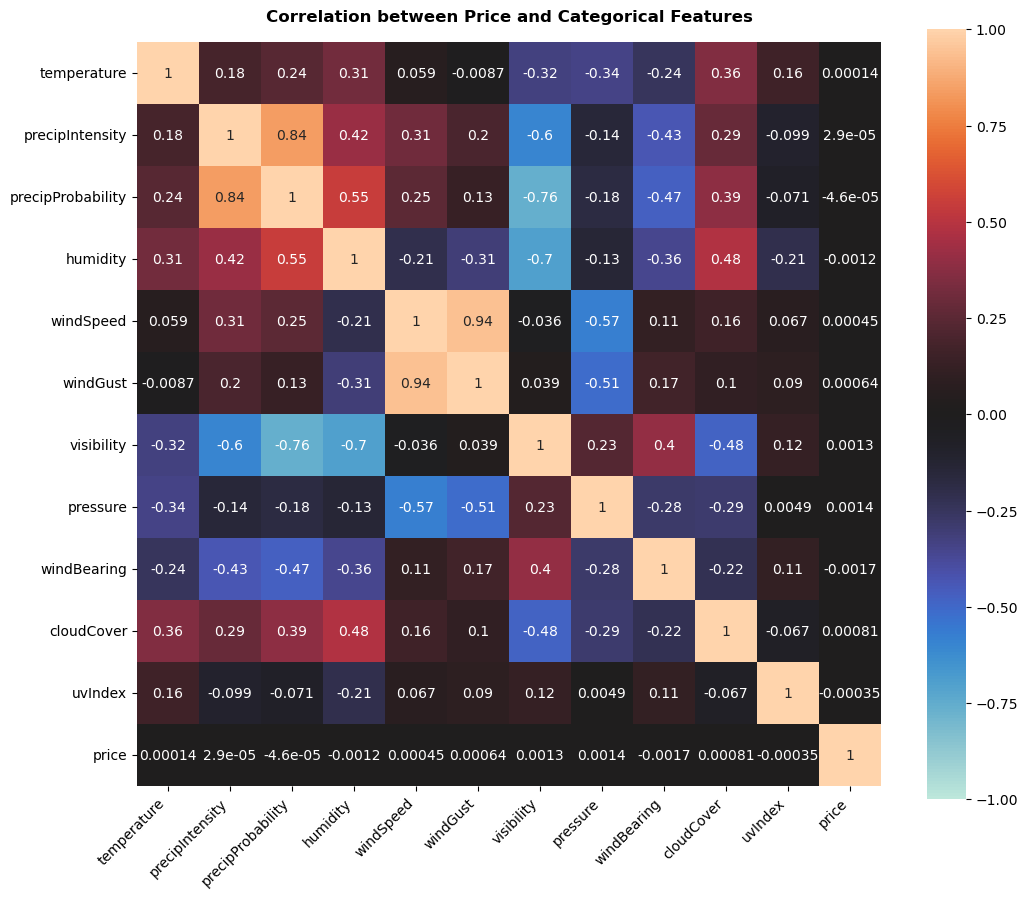

In [15]:
# Create a new dataframe to have categorical variables and 'price'
weather_price_df = no_outlier_df[['temperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
                                  'windGust', 'visibility', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'price']]

# Create heatmap
correlation = weather_price_df.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation between Price and Categorical Features', size = 12, pad = 15, fontweight = "bold")
plt.show()

From the heatmap above, all the weather related features has correlation close to zero. They are not related to 'price' and they are removed from the dataset.

In [16]:
# Remove irrelevant features
related_feature_df = no_outlier_df.drop(columns=['temperature', 'precipIntensity', 'precipProbability', 'humidity', 
                                            'windSpeed', 'windGust', 'visibility', 'pressure', 'windBearing',
                                            'cloudCover', 'uvIndex',], axis=1)
related_feature_df.head()

,cab_type,name,price,distance
0,Lyft,Shared,5.0,0.44
1,Lyft,Lux,11.0,0.44
2,Lyft,Lyft,7.0,0.44
3,Lyft,Lux Black XL,26.0,0.44
4,Lyft,Lyft XL,9.0,0.44


### Encoding Categorical Variables

In [17]:
# Using OneHotEncoder to encode 'name' and 'cab_type'
dummy_purpose = pd.get_dummies(related_feature_df['name'])
encoded_df = pd.concat((related_feature_df.iloc[:,0], dummy_purpose, related_feature_df.iloc[:,1:]), axis=1)
dummy_purpose = pd.get_dummies(related_feature_df['cab_type'])
encoded_df = pd.concat((encoded_df.iloc[:,0], dummy_purpose, encoded_df.iloc[:,1:]), axis=1)

# Remove the original columns
encoded_df = encoded_df.drop(columns=['name', 'cab_type'], axis=1)
encoded_df.head()

,Lyft,Uber,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,price,distance
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5.0,0.44
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,11.0,0.44
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7.0,0.44
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,26.0,0.44
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,9.0,0.44


# Linear Regression Model

In [18]:
X = encoded_df.drop(columns=['price'], axis=1).values
y = encoded_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print("MSE: ", mean_squared_error(y_test, predicted))
print("R squared:", r2_score(y_test, predicted))

MSE:  6.424348093323987
R squared: 0.9163655470386963


Both MSE and R squared show a good fit of the model. R squared get 91.7%, which is close to 1, and MSE get 6.38, which is not high and close to 0.

# KNN Model

In [19]:
# Convert 'price' into a list and assign a variable to the list
price_list = encoded_df['price'].tolist()

# Using for-loop to loop through each value of 'price'
index = 0
for price in price_list:
    if price>=2.5 and price <=22.5:
        price_list[index] = 'low_price'
    else:
        price_list[index] = 'high_price'
    index += 1

# Convert the list back to dataframe and update the values of'price'
price_df = pd.DataFrame(price_list, columns = ['price'])
knn_df = related_feature_df.copy().reset_index(drop=True)
knn_df.update(price_df)
knn_df.head()

,cab_type,name,price,distance
0,Lyft,Shared,low_price,0.44
1,Lyft,Lux,low_price,0.44
2,Lyft,Lyft,low_price,0.44
3,Lyft,Lux Black XL,high_price,0.44
4,Lyft,Lyft XL,low_price,0.44


In [20]:
# Convert 'distance' into a list and assign a variable to the list
dist_list = encoded_df['distance'].tolist()

# Using for-loop to loop through each value of 'price'
index = 0
for dist in dist_list:
    if dist>=0.02 and dist<=3.94:
        dist_list[index] = 'short_distance'
    else:
        dist_list[index] = 'long_distance'
    index += 1

# Convert the list back to dataframe and update the values of'price'
dist_df = pd.DataFrame(dist_list, columns = ['distance'])
knn_df.update(dist_df)
knn_df.head()

,cab_type,name,price,distance
0,Lyft,Shared,low_price,short_distance
1,Lyft,Lux,low_price,short_distance
2,Lyft,Lyft,low_price,short_distance
3,Lyft,Lux Black XL,high_price,short_distance
4,Lyft,Lyft XL,low_price,short_distance


In [21]:
# Convert categorical variable into discrete numbers through LabelEncoder
columns = ['cab_type', 'name', 'distance']
for i in columns:
    knn_df[i] = enc.fit_transform(knn_df[i])
knn_df.head()

,cab_type,name,price,distance
0,0,7,low_price,1
1,0,2,low_price,1
2,0,5,low_price,1
3,0,4,high_price,1
4,0,6,low_price,1


In [22]:
# Train and test split
X = knn_df.drop(columns=['price'], axis=1).values
y = knn_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
clf_knn = KNeighborsClassifier(n_neighbors=100)
clf_knn.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('KNN testing accuracy:', knn_accuracy)

KNN testing accuracy: 0.9467415573983061


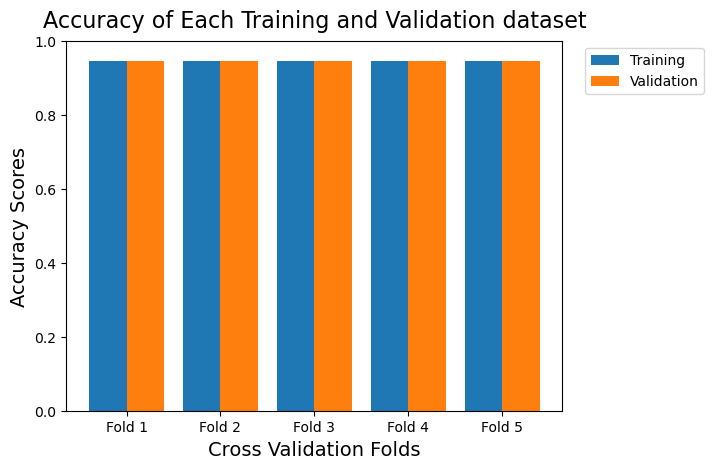

In [23]:
# K-fold cross validation
knn_scores = cross_validate(clf_knn, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)

# Bar plot of performance evaluation
X = [f"Fold {i}" for i in range(1, 6)]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, knn_scores['train_score'], 0.4, label = "Training")
plt.bar(X_axis + 0.2, knn_scores['test_score'], 0.4, label = "Validation")
plt.xticks(X_axis, X)
plt.xlabel("Cross Validation Folds", fontsize=14)
plt.ylabel("Accuracy Scores", fontsize=14)
plt.title("Accuracy of Each Training and Validation dataset", fontsize=16, pad=10)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.ylim([0, 1])
plt.show()

From the graph above, it can be observed that the model prediction performance is good. Due to the large dataset, both training and validation accuracy achieves nearly identical accuracy level. The cross validation indicates an accurate model is acquired.

# Gaussian Naive Bayes Model

In [24]:
# Train and test split
X = knn_df.drop(columns=['price'], axis=1).values
y = knn_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
gau_accuracy = accuracy_score(y_test, y_pred)
print('Gaussian testing accuracy:', gau_accuracy)

Gaussian testing accuracy: 0.7705585811242465


# Visualisation of Accuracy Scores

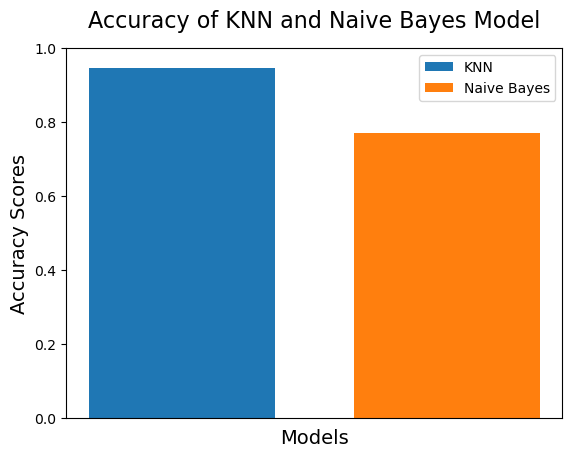

In [25]:
X_axis = np.arange(1)
fig, ax = plt.subplots()
ax.bar(X_axis, knn_accuracy, 0.07, label="KNN")
ax.bar(X_axis +0.1, gau_accuracy, 0.07, label="Naive Bayes")
plt.xticks([])
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy Scores", fontsize=14)
plt.title("Accuracy of KNN and Naive Bayes Model", fontsize=16, pad=15)
plt.legend()
plt.ylim([0, 1])
plt.show()

After applying both KNN and Gaussian Naive Bayes models, both models have a high accuracy score. KNN obtains 94.6% of accuracy score and Gaussian Naive Bayes obtains 77.2% of accuracy score. KNN is more accurate on predicting the price of ridesharing service.

# Summary

This analysis has obtained dataset of ridesharing service in Boston between 11-26-2018 to 12-18-2018. The dataset is enormous and it is used to predict the price of the ridesharing service. Many irrelevant features are removed at the beginning for the ease of analysis, then data exploration is carried out. Exploration is implemented on the data of ridesharing service usage on each day and weekday, ridesharing service number of source and destination, and the target feature price. During the exploration on price data, outliers are removed based on the result of boxplot. Subsequently, data processing is performed where further irrelevant features are removed from the dataset through examination on correlation between features and price. Low correlation features are removed and high correlation features are retained.

Ultimately, only 4 features are remained in the dataset for modelling and they are 'cab_type', 'name', 'price', and 'distance'. In this analysis, linear regression, KNN, and Gaussian Naive Bayes models are used to predict the price of ridesharing service from other related features. From the linear regression model, it obtains a good R squared and MSE results where both indicate the model is a good fit. For KNN model, it also obtains a high accuracy score showing that the model can predict the price accurately. The model prediction performance can be proved by K-fold Cross Validation where both training and validation accuracy scores are similar. Since the dataset is large, it will take a very long time to complete parameter analysis. Hence, for ease of time, parameter analysis is not implemented and the model is fitted with a parameter, in this case it is 100, that can achieves high level of accuracy score. Lastly, Gaussian Naive Bayes model obtains a moderately high accuracy score. In this case, KNN model has a superior performance than Gaussian Naive Bayes model. As a result, KNN model is a superior model in predicting the price of rideshare service in Boston. 